# Classification model on Cardiotocography dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.regularizers import l2
import multiprocessing as mp
from time import time


import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set parameters
The decay parameter used is the determined optimal value.

In [2]:
lr = 0.01
no_epochs = 200
batch_size = 64
beta = 10**-9

NO_INPUTS = 21
no_neurons = 10
NO_CLASSES = 3


seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

## Read data

In [3]:
# read in data from csv file
df = pd.read_csv('ctg_data_cleaned.csv')
df=df.values

In [4]:
# data
# generate training data from csv file

# inputs are the first 21 columns
X = df[:,0:21]
# normalizing every input
max_arr = np.max(X, axis = 0)
min_arr = np.min(X, axis = 0)
for i in range(2126):
    for j in range(21):
        X[i,j] = (X[i,j] - min_arr[j])/(max_arr[j] - min_arr[j])

# target is the last column
Y = df[:,22]
# convert [1,2,3] to [0,1,2] as class label starts from 0
Y -= 1
Y = Y.reshape(2126,1).astype(int)

# split training and testing sets (70/30)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42) 

## Build and train model

In [5]:
# min and max value for weight initialization
w_min_relu = -np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons)
w_max_relu = np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons)
w_min_softmax = -4*np.sqrt(6)/np.sqrt(no_neurons+NO_CLASSES)
w_max_softmax = 4*np.sqrt(6)/np.sqrt(no_neurons+NO_CLASSES)


model = Sequential([Dense(no_neurons, activation='relu', 
                          kernel_initializer=RandomUniform(w_min_relu, w_max_relu), 
                          kernel_regularizer=l2(beta)),
                    Dense(NO_CLASSES, activation='softmax', 
                          kernel_initializer=RandomUniform(w_min_softmax, w_max_softmax),
                          kernel_regularizer=l2(beta))])
        
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=1,
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))

    


Epoch 1/200
24/24 [==============================] - 0s 8ms/step - loss: 0.9975 - accuracy: 0.6465 - val_loss: 0.7631 - val_accuracy: 0.7571
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.8581 - accuracy: 0.7715 - val_loss: 0.7167 - val_accuracy: 0.7712
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.8046 - accuracy: 0.7776 - val_loss: 0.6802 - val_accuracy: 0.7759
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7593 - accuracy: 0.7802 - val_loss: 0.6485 - val_accuracy: 0.7821
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.7816 - val_loss: 0.6222 - val_accuracy: 0.7821
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.7836 - val_loss: 0.5991 - val_accuracy: 0.7868
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7849 - val_loss: 0.5801 - val_accuracy: 0.7947
Epoch 8/200
2

Epoch 59/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8609 - val_loss: 0.3496 - val_accuracy: 0.8840
Epoch 60/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8589 - val_loss: 0.3496 - val_accuracy: 0.8871
Epoch 61/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8595 - val_loss: 0.3479 - val_accuracy: 0.8871
Epoch 62/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8609 - val_loss: 0.3474 - val_accuracy: 0.8887
Epoch 63/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8609 - val_loss: 0.3445 - val_accuracy: 0.8824
Epoch 64/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8616 - val_loss: 0.3441 - val_accuracy: 0.8887
Epoch 65/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8629 - val_loss: 0.3433 - val_accuracy: 0.8856
Epoch 

24/24 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.8750 - val_loss: 0.3099 - val_accuracy: 0.8966
Epoch 117/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8750 - val_loss: 0.3111 - val_accuracy: 0.8934
Epoch 118/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8777 - val_loss: 0.3110 - val_accuracy: 0.8934
Epoch 119/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8777 - val_loss: 0.3110 - val_accuracy: 0.8934
Epoch 120/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8777 - val_loss: 0.3099 - val_accuracy: 0.8950
Epoch 121/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8743 - val_loss: 0.3108 - val_accuracy: 0.8918
Epoch 122/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.8810 - val_loss: 0.3072 - val_accuracy: 0.8950
Epoch 123/200

24/24 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.8831 - val_loss: 0.2981 - val_accuracy: 0.8840
Epoch 174/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8844 - val_loss: 0.2921 - val_accuracy: 0.8997
Epoch 175/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8837 - val_loss: 0.2934 - val_accuracy: 0.8966
Epoch 176/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8878 - val_loss: 0.2947 - val_accuracy: 0.8918
Epoch 177/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8884 - val_loss: 0.2924 - val_accuracy: 0.8997
Epoch 178/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8851 - val_loss: 0.2928 - val_accuracy: 0.8966
Epoch 179/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8858 - val_loss: 0.2905 - val_accuracy: 0.9013
Epoch 180/200

## Plot accuracy and loss curve

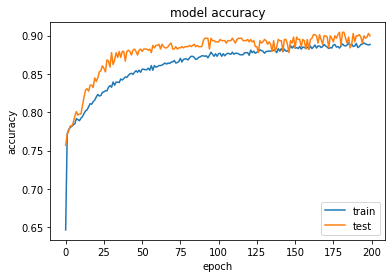

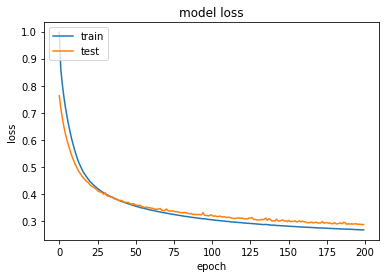

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig("4cAcc.png")
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("4cLoss.png")
plt.show()
